In [1]:
import numpy as np
pi=np.pi
#
import matplotlib.pyplot as plt

In [2]:
import phasr as phr

In [3]:
phr.__version__

'0.3.1.dev0+gea06a1e.d20250207'

# Nuclei

In [97]:
# Coulomb
nucleus_coulomb = phr.nucleus('Al27_coulomb',Z=13,A=27)

In [98]:
# Fourier Bessel
ai_Al27=np.array([0.43418e-1,0.60298e-1,0.28950e-2,-0.23522e-1,-0.79791e-2,0.23010e-2,0.10794e-2,0.12574e-3,-0.13021e-3,0.56563e-4,-0.18011e-4,0.42869e-5])
nucleus_FB = phr.nucleus('Al27_FB',Z=13,A=27,ai=ai_Al27,R=7)

In [99]:
# Fermi (2 parameter)
nucleus_2pF = phr.nucleus('Al27_2pF',Z=13,A=27,c=3.07,z=0.519)
nucleus_2pF.fill_gaps()

data loaded from  ./tmp/nucleus_splines/electric_field_Al27_2pFfermi2p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/electric_potential_Al27_2pFfermi2p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/form_factor_Al27_2pFfermi2p_x=0.0-1000.0-1.0.txt


In [100]:
# Gauss
nucleus_gauss = phr.nucleus('Al27_gauss',Z=13,A=27,b=2.48)

In [101]:
# Uniform
nucleus_uni = phr.nucleus('Al27_uni',Z=13,A=27,rc=3.92)

In [102]:
# oszillator basis (shell model)
Cs_M00_Al27=np.array([27, -11.3343, 0.837814])
Cs_M01_Al27=np.array([2*13-27, 0.666696, -0.0858552])
Cs_Phipp00_Al27=np.array([-4.98975 , 0.997985])
Cs_Phipp01_Al27=np.array([0.303398 , -0.0606814])
Ci_dict_Al27={'M00':Cs_M00_Al27,'M01':Cs_M01_Al27,'Phipp00':Cs_Phipp00_Al27,'Phipp01':Cs_Phipp01_Al27}
nucleus_osz = phr.nucleus('Al27_osz',Z=13,A=27,Ci_dict=Ci_dict_Al27)

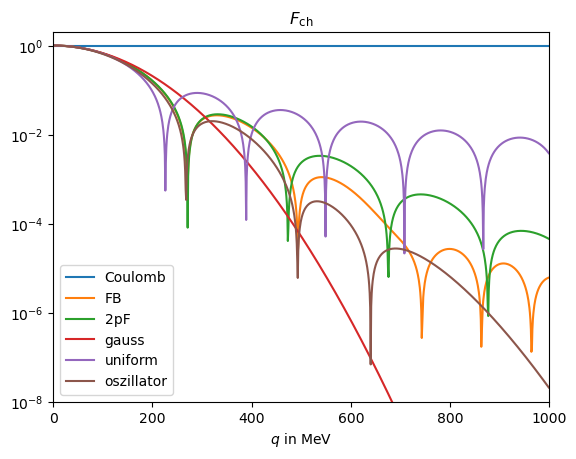

In [103]:
q=np.arange(1,1000,1.)
plt.plot(q,np.abs(nucleus_coulomb.form_factor(q)),label='Coulomb')
plt.plot(q,np.abs(nucleus_FB.form_factor(q)),label='FB')
plt.plot(q,np.abs(nucleus_2pF.form_factor(q)),label='2pF')
plt.plot(q,np.abs(nucleus_gauss.form_factor(q)),label='gauss')
plt.plot(q,np.abs(nucleus_uni.form_factor(q)),label='uniform')
plt.plot(q,np.abs(nucleus_osz.form_factor(q)),label='oszillator')
plt.title(r'$F_\operatorname{ch}$')
plt.xlabel(r'$q$ in MeV')
plt.ylim(1e-8,2)
plt.xlim(0,1000)
plt.yscale('log')
plt.legend()
plt.show()

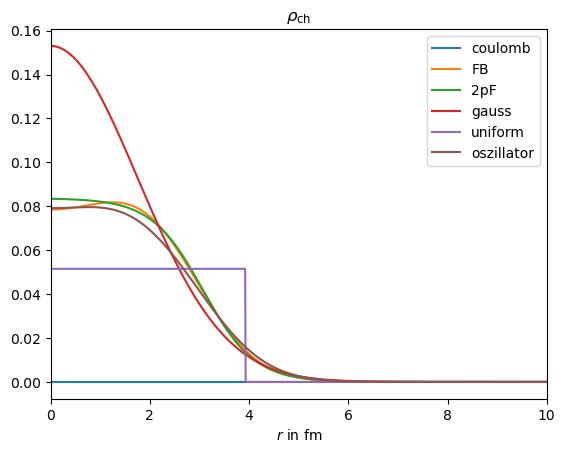

In [104]:
r=np.arange(0,10,1e-2)
plt.plot(r,nucleus_coulomb.charge_density(r),label='coulomb')
plt.plot(r,nucleus_FB.charge_density(r),label='FB')
plt.plot(r,nucleus_2pF.charge_density(r),label='2pF')
plt.plot(r,nucleus_gauss.charge_density(r),label='gauss')
plt.plot(r,nucleus_uni.charge_density(r),label='uniform')
plt.plot(r,nucleus_osz.charge_density(r),label='oszillator')
plt.xlim(0,10)
plt.title(r'$\rho_\operatorname{ch}$')
plt.xlabel(r'$r$ in fm')
plt.legend()
plt.show()

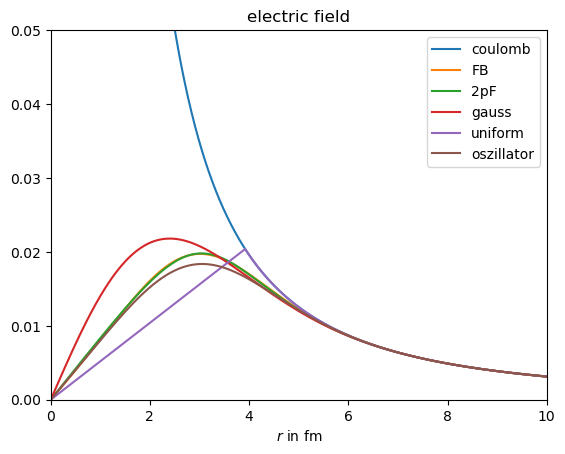

In [105]:
r=np.arange(1e-2,10,1e-2)
plt.plot(r,nucleus_coulomb.electric_field(r),label='coulomb')
plt.plot(r,nucleus_FB.electric_field(r),label='FB')
plt.plot(r,nucleus_2pF.electric_field(r),label='2pF')
plt.plot(r,nucleus_gauss.electric_field(r),label='gauss')
plt.plot(r,nucleus_uni.electric_field(r),label='uniform')
plt.plot(r,nucleus_osz.electric_field(r),label='oszillator')
plt.xlim(0,10)
plt.ylim(0,0.05)
plt.title(r'electric field')
plt.xlabel(r'$r$ in fm')
plt.legend()
plt.show()

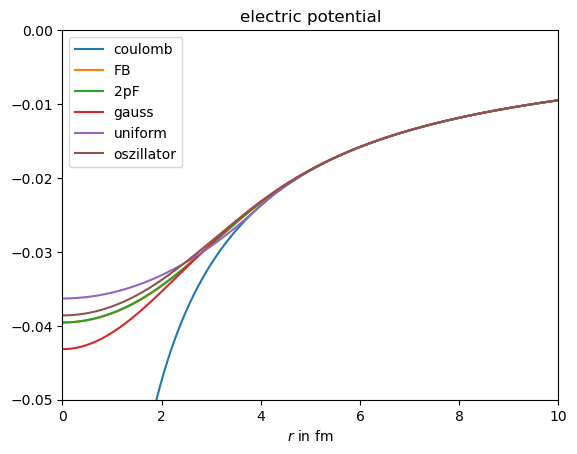

In [96]:
r=np.arange(1e-2,10,1e-2)
plt.plot(r,nucleus_coulomb.electric_potential(r),label='coulomb')
plt.plot(r,nucleus_FB.electric_potential(r),label='FB')
plt.plot(r,nucleus_2pF.electric_potential(r),label='2pF')
plt.plot(r,nucleus_gauss.electric_potential(r),label='gauss')
plt.plot(r,nucleus_uni.electric_potential(r),label='uniform')
plt.plot(r,nucleus_osz.electric_potential(r),label='oszillator')
plt.ylim(-0.05,0)
plt.xlim(0,10)
plt.title(r'electric potential')
plt.xlabel(r'$r$ in fm')
plt.legend()
plt.show()

# Boundstates

In [106]:
# Fourier Bessel
ai_Al27=np.array([0.43418e-1,0.60298e-1,0.28950e-2,-0.23522e-1,-0.79791e-2,0.23010e-2,0.10794e-2,0.12574e-3,-0.13021e-3,0.56563e-4,-0.18011e-4,0.42869e-5])
nucleus_Al27 = phr.nucleus('Al27_FB',Z=13,A=27,ai=ai_Al27,R=7)

In [122]:
boundstates_l0_Al27 = phr.boundstates(nucleus_Al27,kappa=-1,lepton_mass=phr.masses.mmu) 
print('E_1s=',boundstates_l0_Al27.energy_levels[0],'MeV') 

E_1s= -0.4650383801521656 MeV


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


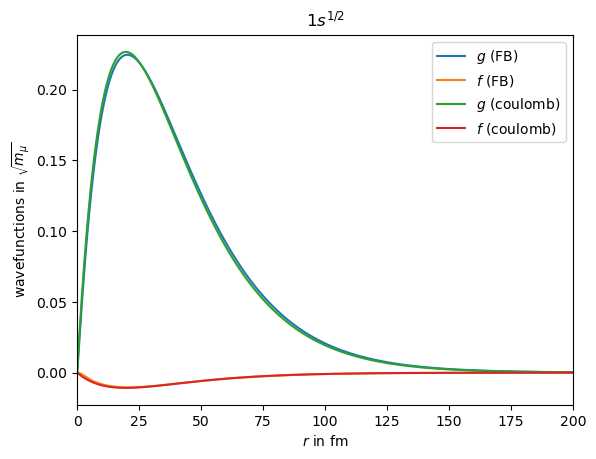

In [125]:
r=np.arange(0,200,0.1)

plt.plot(r,boundstates_l0_Al27.wavefunction_g_1s12(r),label=r'$g$ (FB)')
plt.plot(r,boundstates_l0_Al27 .wavefunction_f_1s12(r),label=r'$f$ (FB)')

f_c=lambda r: phr.nuclei.parameterizations.coulomb.f_coulomb_nk(r,n=1,kappa=-1,Z=13,mass=phr.masses.mmu)/np.sqrt(phr.masses.mmu)
g_c=lambda r: phr.nuclei.parameterizations.coulomb.g_coulomb_nk(r,n=1,kappa=-1,Z=13,mass=phr.masses.mmu)/np.sqrt(phr.masses.mmu)
plt.plot(r,g_c(r),label=r'$g$ (coulomb)')
plt.plot(r,f_c(r),label=r'$f$ (coulomb)')

plt.title(r'$1s^{1/2}$')
plt.xlim(0,200)
plt.xlabel(r'$r$ in fm')
plt.ylabel(r'wavefunctions in $\sqrt{m_\mu}$')
plt.legend()

#plt.ylim(-1e0,1e0)

In [135]:
boundstates_l0_Al27.find_next_solution() 
print('E_2s=',boundstates_l0_Al27.energy_levels[1],'MeV') 

E_2s= -0.11774970562665743 MeV


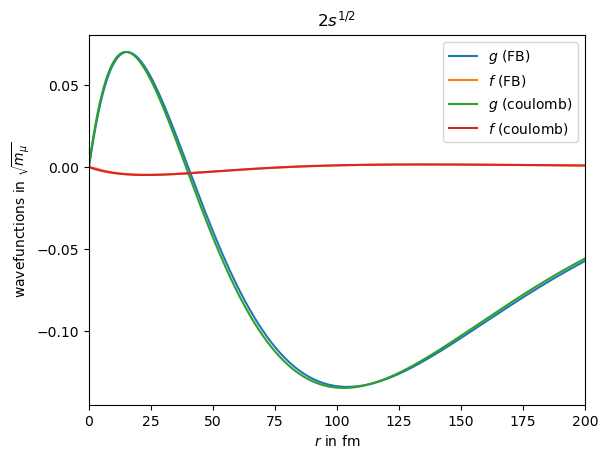

In [137]:
r=np.arange(0,200,0.1)

plt.plot(r,boundstates_l0_Al27.wavefunction_g_2s12(r),label=r'$g$ (FB)')
plt.plot(r,boundstates_l0_Al27 .wavefunction_f_2s12(r),label=r'$f$ (FB)')

f_c=lambda r: phr.nuclei.parameterizations.coulomb.f_coulomb_nk(r,n=2,kappa=-1,Z=13,mass=phr.masses.mmu)/np.sqrt(phr.masses.mmu)
g_c=lambda r: phr.nuclei.parameterizations.coulomb.g_coulomb_nk(r,n=2,kappa=-1,Z=13,mass=phr.masses.mmu)/np.sqrt(phr.masses.mmu)
plt.plot(r,g_c(r),label=r'$g$ (coulomb)')
plt.plot(r,f_c(r),label=r'$f$ (coulomb)')

plt.title(r'$2s^{1/2}$')
plt.xlim(0,200)
plt.xlabel(r'$r$ in fm')
plt.ylabel(r'wavefunctions in $\sqrt{m_\mu}$')
plt.legend()

#plt.ylim(-1e0,1e0)

In [128]:
boundstates_l1_Al27 = phr.boundstates(nucleus_Al27,kappa=+1,lepton_mass=phr.masses.mmu) 
print('E_2p12=',boundstates_l1_Al27.energy_levels[0],'MeV') 

E_2p12= -0.11921144660932725 MeV


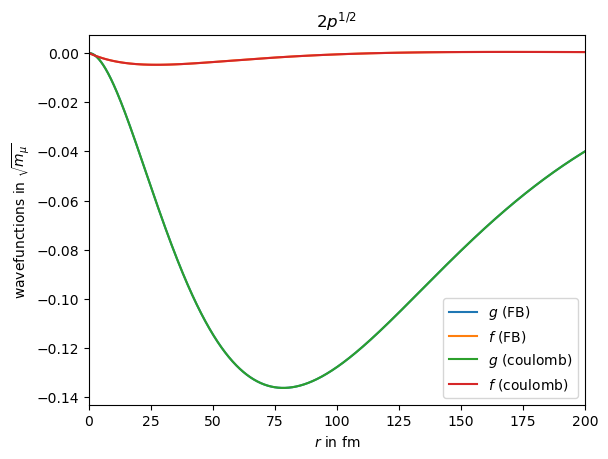

In [134]:
r=np.arange(0,200,0.1)

plt.plot(r,boundstates_l1_Al27.wavefunction_g_2p12(r),label=r'$g$ (FB)')
plt.plot(r,boundstates_l1_Al27 .wavefunction_f_2p12(r),label=r'$f$ (FB)')

f_c=lambda r: phr.nuclei.parameterizations.coulomb.f_coulomb_nk(r,n=2,kappa=+1,Z=13,mass=phr.masses.mmu)/np.sqrt(phr.masses.mmu)
g_c=lambda r: phr.nuclei.parameterizations.coulomb.g_coulomb_nk(r,n=2,kappa=+1,Z=13,mass=phr.masses.mmu)/np.sqrt(phr.masses.mmu)
plt.plot(r,g_c(r),label=r'$g$ (coulomb)')
plt.plot(r,f_c(r),label=r'$f$ (coulomb)')

plt.title(r'$2p^{1/2}$')
plt.xlim(0,200)
plt.xlabel(r'$r$ in fm')
plt.ylabel(r'wavefunctions in $\sqrt{m_\mu}$')
plt.legend()

#plt.ylim(-1e0,1e0)

# Continuumstates

In [138]:
# Fourier Bessel
ai_Al27=np.array([0.43418e-1,0.60298e-1,0.28950e-2,-0.23522e-1,-0.79791e-2,0.23010e-2,0.10794e-2,0.12574e-3,-0.13021e-3,0.56563e-4,-0.18011e-4,0.42869e-5])
nucleus_Al27 = phr.nucleus('Al27_FB',Z=13,A=27,ai=ai_Al27,R=7)

In [141]:
continuumstates_l0_Al27 = phr.continuumstates(nucleus_Al27,kappa=-1,energy=250)
continuumstates_l0_Al27.solve_IVP()

(0.0, 50.0)

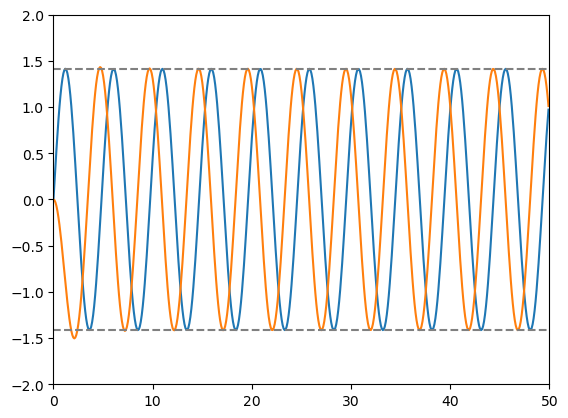

In [140]:
r=np.arange(0,50,0.1)
plt.plot(r,continuumstates_l0_Al27.wavefct_g(r))
plt.plot(r,continuumstates_l0_Al27.wavefct_f(r))
plt.plot(r,r*0+np.sqrt(2),color='gray',linestyle='--')
plt.plot(r,r*0-np.sqrt(2),color='gray',linestyle='--')
plt.ylim(-2,2)
plt.xlim(0,50)

In [142]:
continuumstates_l1_Al27 = phr.continuumstates(nucleus_Al27,kappa=+1,energy=250)
continuumstates_l1_Al27.solve_IVP()

(0.0, 50.0)

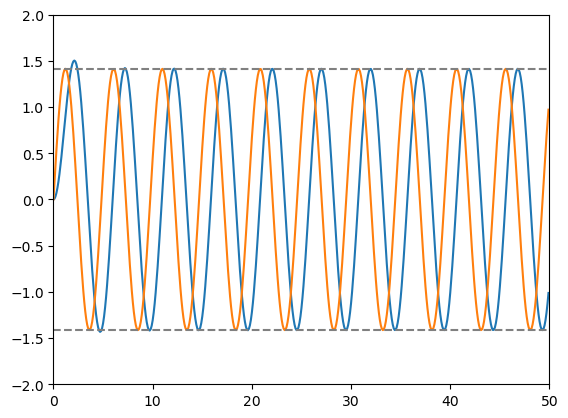

In [143]:
r=np.arange(0,50,0.1)
plt.plot(r,continuumstates_l1_Al27.wavefct_g(r))
plt.plot(r,continuumstates_l1_Al27.wavefct_f(r))
plt.plot(r,r*0+np.sqrt(2),color='gray',linestyle='--')
plt.plot(r,r*0-np.sqrt(2),color='gray',linestyle='--')
plt.ylim(-2,2)
plt.xlim(0,50)

# Crosssection

In [4]:
# Fourier Bessel
ai_Al27=np.array([0.43418e-1,0.60298e-1,0.28950e-2,-0.23522e-1,-0.79791e-2,0.23010e-2,0.10794e-2,0.12574e-3,-0.13021e-3,0.56563e-4,-0.18011e-4,0.42869e-5])
nucleus_Al27 = phr.nucleus('Al27_FB',Z=13,A=27,ai=ai_Al27,R=7)

(0.0, 180.0)

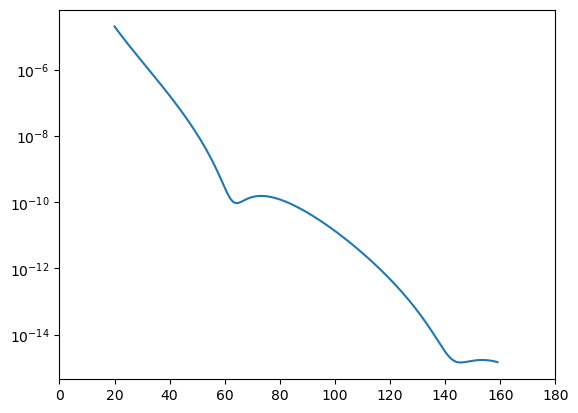

In [6]:
energy=250
theta=np.arange(20,160,1)
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_Al27))
plt.yscale('log')
plt.xlim(0,180)

In [145]:
# assess necessary precision # takes a long time, but enables fastest possible evaluation once these are set
energy=250
theta=np.arange(20,160,1)
args=phr.optimise_crosssection_precision(energy,theta*pi/180,nucleus_Al27,crosssection_precision=1e-2)

new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 0.0}
time: 15.553913593292236 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-15}
time: 13.911718130111694 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-14}
time: 13.573878049850464 2.2179802094937374e-10
new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-13}
time: 11.637996912002563 7.335301491112173e-09
new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-12}
time: 11.651094198226929 7.335301491112173e-09
new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-13, 'r

(0.0, 180.0)

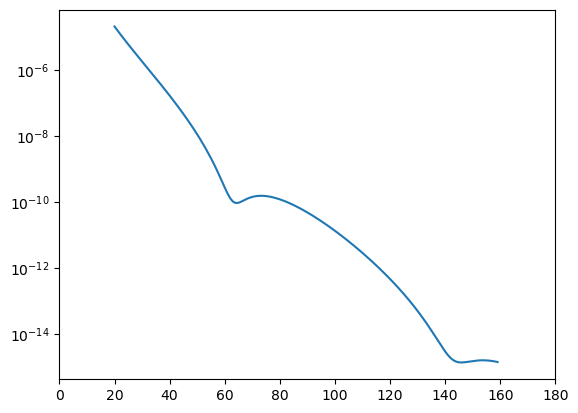

In [147]:
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_Al27,**args))
plt.yscale('log')
plt.xlim(0,180)

# Overlap integral

In [4]:
# oszillator basis (shell model)
Cs_M00_Al27=np.array([27, -11.3343, 0.837814])
Cs_M01_Al27=np.array([2*13-27, 0.666696, -0.0858552])
Cs_Phipp00_Al27=np.array([-4.98975 , 0.997985])
Cs_Phipp01_Al27=np.array([0.303398 , -0.0606814])
Ci_dict_Al27={'M00':Cs_M00_Al27,'M01':Cs_M01_Al27,'Phipp00':Cs_Phipp00_Al27,'Phipp01':Cs_Phipp01_Al27}
nucleus_osz_Al27 = phr.nucleus('Al27_osz',Z=13,A=27,Ci_dict=Ci_dict_Al27)

In [5]:
phr.overlap_integral_dipole(nucleus_osz_Al27,nonzero_electron_mass=0)

0.034654184205517656

In [10]:
phr.overlap_integral_scalar(nucleus_osz_Al27,'p')

0.01527008741918215

In [11]:
phr.overlap_integral_scalar(nucleus_osz_Al27,'n')

0.016248464648204435

In [12]:
phr.overlap_integral_vector(nucleus_osz_Al27,'p')

0.015829828311490206

In [13]:
phr.overlap_integral_vector(nucleus_osz_Al27,'n')

0.01685618379272597